In [1]:
import numpy as np
import pandas as pd
import scipy.stats as st
IMSIZE = (286, 604)

Считаем наши данные

In [2]:
train = np.load("regression_x_train.npy")
y = np.load("regression_y_train.npy")

In [3]:
train.shape, y.shape

((286, 604, 35), (286, 604))

Посмотрим, что за картинка зашифрована, а также посмотрим на каждый из признаков

In [4]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


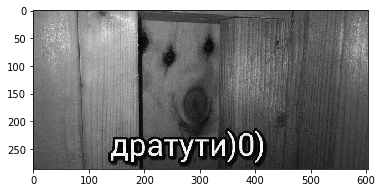

In [5]:
plt.imshow(y, "gray")

In [6]:
sliced = np.transpose(train, (2,0,1))

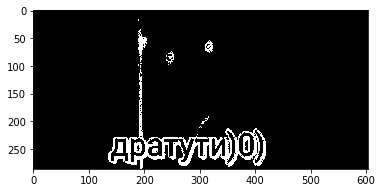

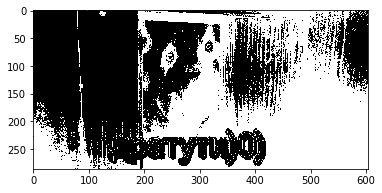

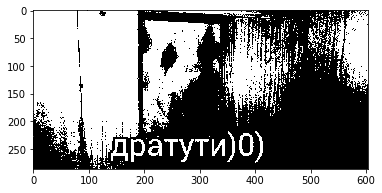

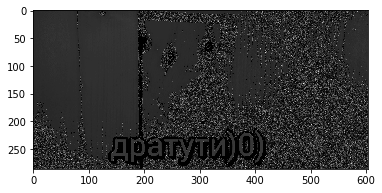

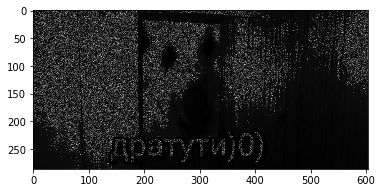

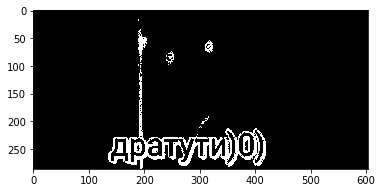

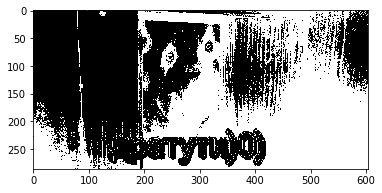

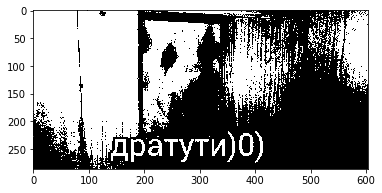

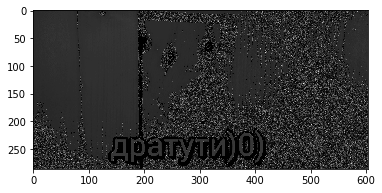

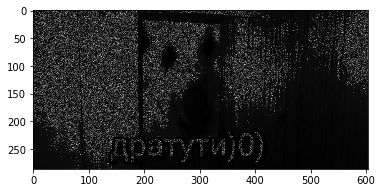

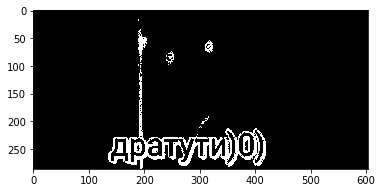

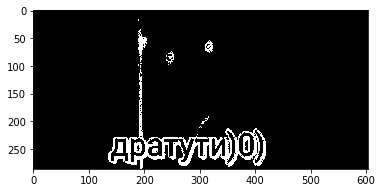

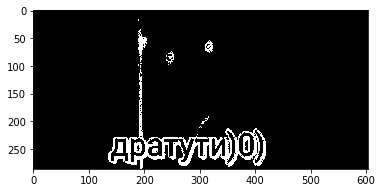

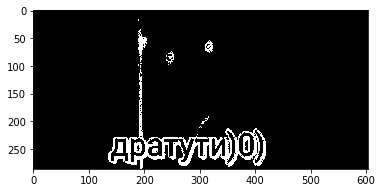

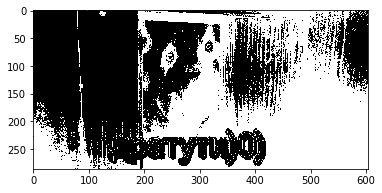

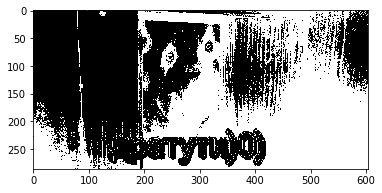

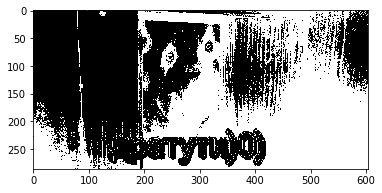

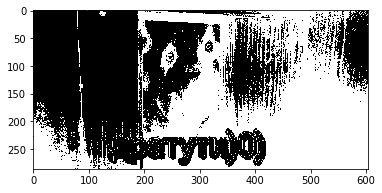

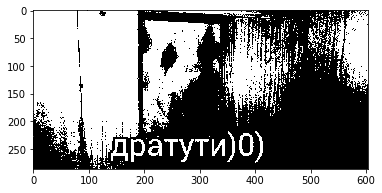

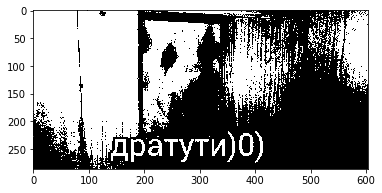

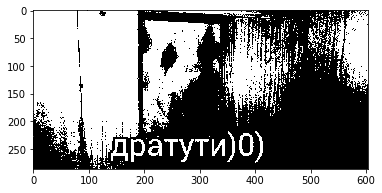

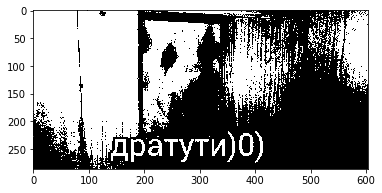

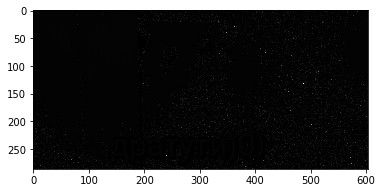

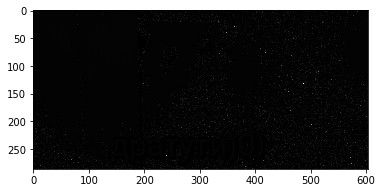

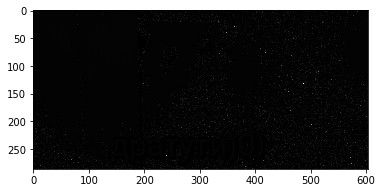

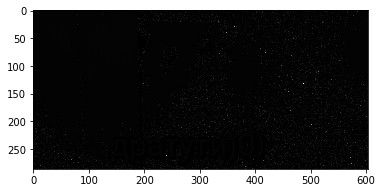

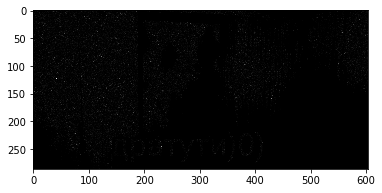

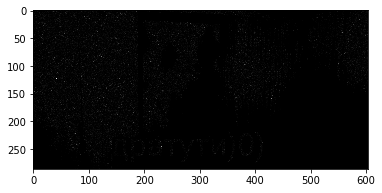

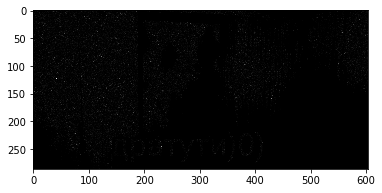

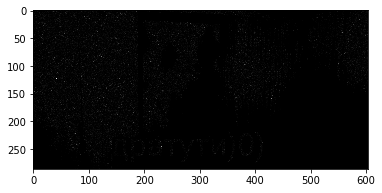

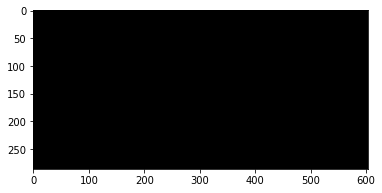

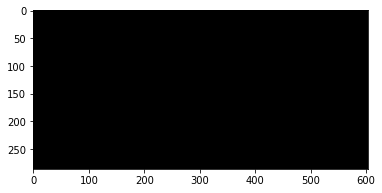

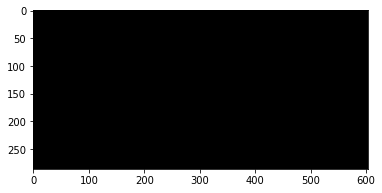

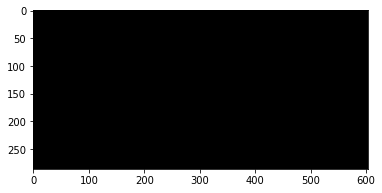

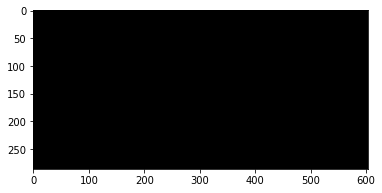

In [7]:
for i in range(35):
    plt.imshow(sliced[i], "gray")
    plt.show()

In [8]:
np.reshape(range(1, 21), (5,2,2)).transpose(1,2,0).reshape(4,5) #проверка корректности

array([[ 1,  5,  9, 13, 17],
       [ 2,  6, 10, 14, 18],
       [ 3,  7, 11, 15, 19],
       [ 4,  8, 12, 16, 20]])

In [9]:
train = train.reshape(-1,35) #вытянем все в одну табличку. Итого имеем 172744 объекта с 35 признаками
y = y.reshape(-1)
train.shape, y.shape

((172744, 35), (172744,))

In [10]:
cols = ["f{}".format(x) for x in range(35)]
data = pd.DataFrame(train, columns=cols)
data["y"] = y
data.head(10)

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f26,f27,f28,f29,f30,f31,f32,f33,f34,y
0,0.496714,-0.138264,1.647689,2.288549,0.859431,-0.070241,0.473764,1.23023,0.624677,1.256353,...,45.607623,38.750030,147.605407,252.427767,-0.601707,1.852278,-0.013497,-1.057711,0.822545,0.658741
1,0.496714,-0.138264,1.647689,2.293655,-0.079660,-0.070241,0.473764,1.23023,0.629783,0.317261,...,17.831804,15.150602,57.711200,98.694957,-0.601707,1.852278,-0.013497,-1.057711,0.822545,0.671523
2,0.496714,-0.138264,1.647689,2.296195,1.243614,-0.070241,0.473764,1.23023,0.632323,1.640535,...,66.970839,56.901059,216.745739,370.668282,-0.601707,1.852278,-0.013497,-1.057711,0.822545,0.660211
3,0.496714,-0.138264,1.647689,2.296195,0.714635,-0.070241,0.473764,1.23023,0.632323,1.111556,...,39.459637,33.526459,127.707943,218.400068,-0.601707,1.852278,-0.013497,-1.057711,0.822545,0.662597
4,0.496714,-0.138264,1.647689,2.288549,0.422087,-0.070241,0.473764,1.23023,0.624677,0.819008,...,29.451076,25.022793,95.316041,163.004973,-0.601707,1.852278,-0.013497,-1.057711,0.822545,0.658827
5,0.496714,-0.138264,1.647689,2.283409,0.157620,-0.070241,0.473764,1.23023,0.619537,0.554542,...,22.607099,19.207880,73.166059,125.125124,-0.601707,1.852278,-0.013497,-1.057711,0.822545,0.661236
6,0.496714,-0.138264,1.647689,2.288549,0.056618,-0.070241,0.473764,1.23023,0.624677,0.453539,...,20.435252,17.362593,66.137049,113.104445,-0.601707,1.852278,-0.013497,-1.057711,0.822545,0.662627
7,0.496714,-0.138264,1.647689,2.296195,-0.173187,-0.070241,0.473764,1.23023,0.632323,0.223735,...,16.239669,13.797861,52.558384,89.882855,-0.601707,1.852278,-0.013497,-1.057711,0.822545,0.671318
8,0.496714,-0.138264,1.647689,2.291106,0.340416,-0.070241,0.473764,1.23023,0.627234,0.737337,...,27.141378,23.060382,87.840889,150.221323,-0.601707,1.852278,-0.013497,-1.057711,0.822545,0.652888
9,0.496714,-0.138264,1.647689,2.308773,1.524297,-0.070241,0.473764,1.23023,0.644901,1.921218,...,88.671699,75.338963,286.978829,490.777582,-0.601707,1.852278,-0.013497,-1.057711,0.822545,0.690927


In [11]:
from statsmodels.regression.linear_model import OLS

In [12]:
#mini = pd.DataFrame()
#mini["x"] = [1,2,3]
#mini["y"] = [10, 13, 16]

In [13]:
%%time
model = OLS.from_formula("y~" + "*".join(cols[:8]), data).fit()

Wall time: 10.4 s


In [14]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 2.662e+06
Date:                Sat, 27 Apr 2019   Prob (F-statistic):               0.00
Time:                        22:57:59   Log-Likelihood:             5.4322e+05
No. Observations:              172744   AIC:                        -1.086e+06
Df Residuals:                  172735   BIC:                        -1.086e+06
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                6.187e+07   1.73e+08      0.358      0.720   -2.77e+08       4e+08
f0                      -2.068e+08   2.99e+08     -0.691      0.489   -7.93e+08     3.8e+08
f1                      -5.072e+08   5.45e+08     -0.931      0.352   -1.58e+09    5.61e+08
f0:f1                    7.385e+08   5.99e+08      1.233      0.217   -4.35e+08    1.91e+09
f2                       3.481e+08   3.09e+08      1.126      0.260   -2.58e+08    9.54e+08
f0:f2                   -7.739e+08   5.84e+08     -1.325      0.185   -1.92e+09    3.71e+08
f1:f2                   -1.563e+09   1.26e+09     -1.239      0.215   -4.03e+09    9.09e+08
f0:f1:f2                  -1.4e+08   1.51e+08     -0.928      0.353   -4.36e+08    1.56e+08
f3                        2.89e+08   3.23e+08      0.894      0.371   -3.45e+08    9.23e+08
f0:f3                    6.499e+07   5.28e+08      0.123      0.902   -9.71e+08     1.1e+09
f1:f3                    2.092e+08   2.48e+08      0.842      0.400   -2.78e+08    6.96e+08
f0:f1:f3                 1.042e+08   1.34e+08      0.777      0.437   -1.58e+08    3.67e+08
f2:f3                   -2.591e+08   4.99e+08     -0.519      0.604   -1.24e+09     7.2e+08
f0:f2:f3                -1.725e+08   1.67e+08     -1.034      0.301   -4.99e+08    1.55e+08
f1:f2:f3                 4.695e+08   4.49e+08      1.045      0.296   -4.11e+08    1.35e+09
f0:f1:f2:f3              6.832e+07   8.63e+07      0.792      0.428   -1.01e+08    2.37e+08
f4                      -8.407e+06   6.25e+06     -1.346      0.178   -2.07e+07    3.84e+06
f0:f4                   -5.756e+06    2.4e+07     -0.240      0.810   -5.28e+07    4.13e+07
f1:f4                    3.155e+06   4.36e+06      0.723      0.470    -5.4e+06    1.17e+07
f0:f1:f4                 1.142e+06   4.26e+06      0.268      0.789   -7.21e+06     9.5e+06
f2:f4                    4.072e+07   3.61e+07      1.127      0.260   -3.01e+07    1.12e+08
f0:f2:f4                -1.267e+07   1.38e+07     -0.916      0.360   -3.98e+07    1.45e+07
f1:f2:f4                 7.464e+05   1.74e+06      0.428      0.669   -2.67e+06    4.17e+06
f0:f1:f2:f4                 -1e+04   2.94e+06     -0.003      0.997   -5.78e+06    5.76e+06
f3:f4                   -9.061e+05   1.23e+07     -0.073      0.941   -2.51e+07    2.33e+07
f0:f3:f4                 1.231e+06   3.13e+07      0.039      0.969   -6.01e+07    6.26e+07
f1:f3:f4                 6.301e+06   6.38e+06      0.987      0.323   -6.21e+06    1.88e+07
f0:f1:f3:f4              8.608e+06   7.08e+06      1.216      0.224   -5.27e+06    2.25e+07
f2:f3:f4                -7.437e+07   7.19e+07     -1.034      0.301   -2.15e+08    6.66e+07
f0:f2:f3:f4             -3.278e+07   2.48e+07     -1.321      0.187   -8.14e+07    1.59e+07
f1:f2:f3:f4              1.595e+06   1.75e+06  

# Преобразование Бокса-Кокса

In [15]:
st.boxcox(y, alpha=1e-10)
#Как мы видим, 1 в доверительный интервал не входит, поэтому преобразование Бокса-Кокса делать стоит

(array([-0.39568724, -0.37839275, -0.39368473, ..., -0.65003828,
        -0.65027125, -0.62430487]),
 0.2585725978826969,
 (0.1947760362326519, 0.32235243334688063))

Как мы видим, 1 в доверительный интервал не входит, поэтому преобразование Бокса-Кокса делать стоит

In [16]:
y, lambda_ = st.boxcox(y)

In [17]:
data.y = y

In [18]:
import scipy
from scipy.special import inv_boxcox as invb #ДЛЯ ИТОГОВОГО ТЕСТИРОВАНИЯ НЕ ЗАБУДЕМ СДЕЛАТЬ ОБРАТНОЕ ПРЕОБРАЗОВАНИЕ

# Анализ признаков

In [19]:
import seaborn as sns
sliced = sliced.reshape((35, -1))

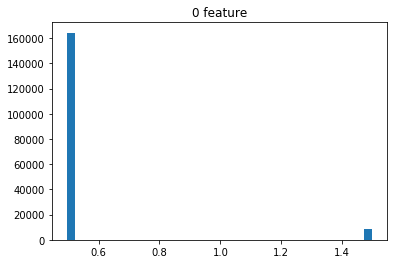

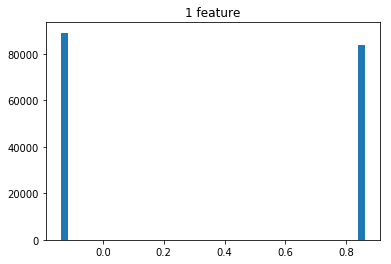

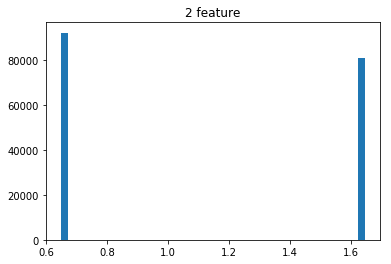

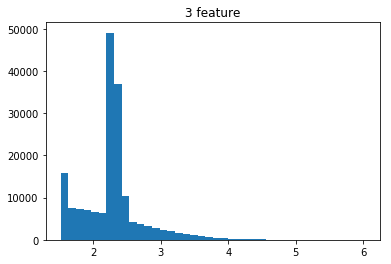

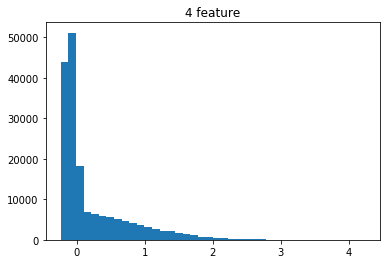

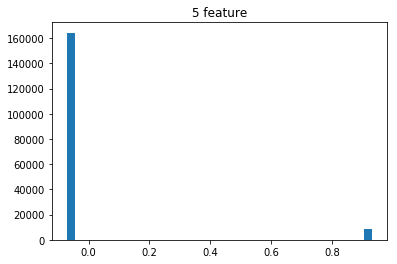

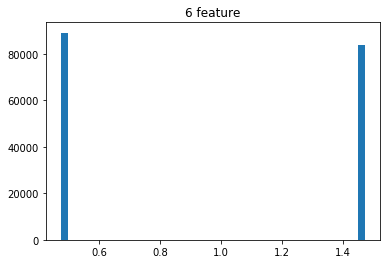

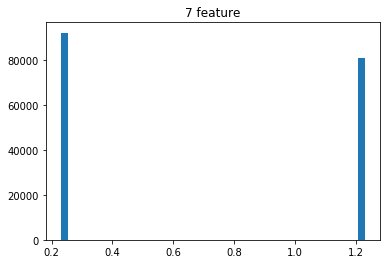

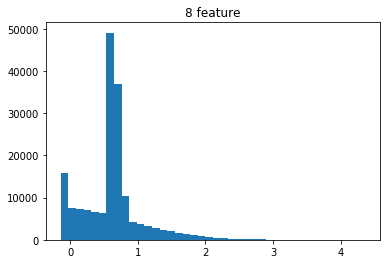

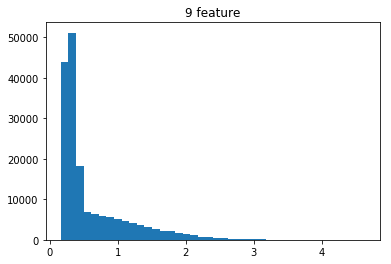

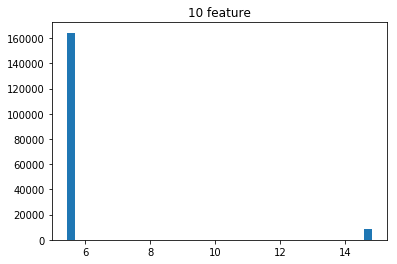

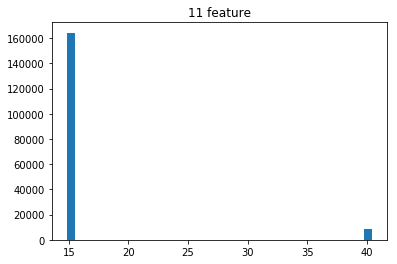

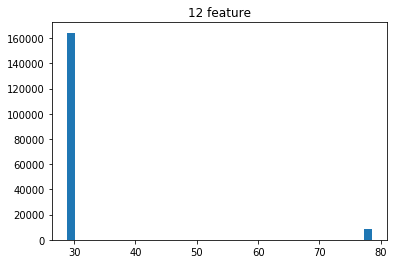

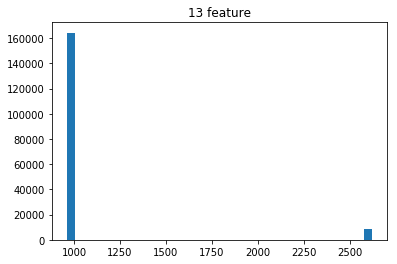

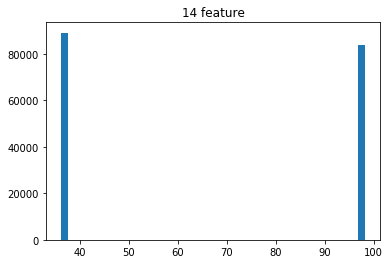

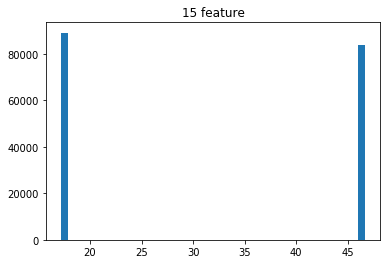

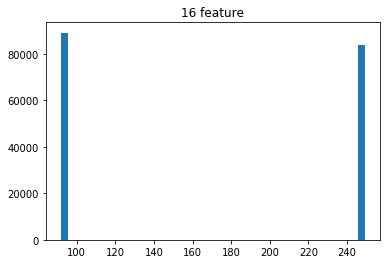

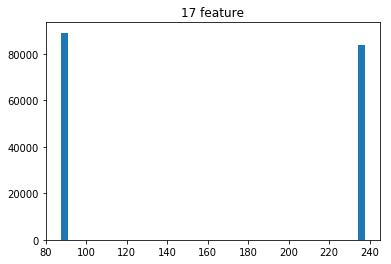

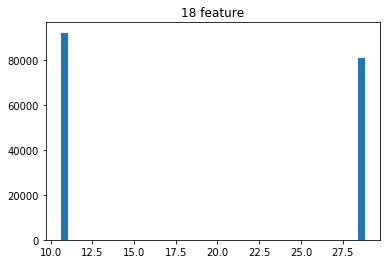

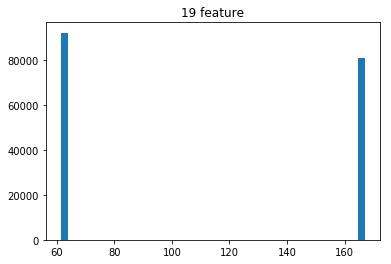

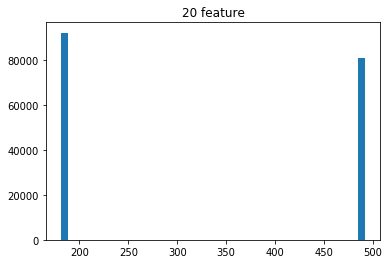

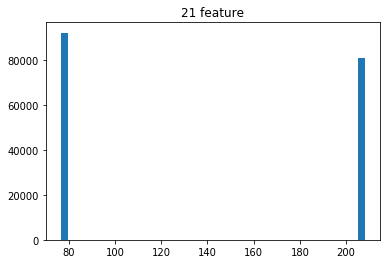

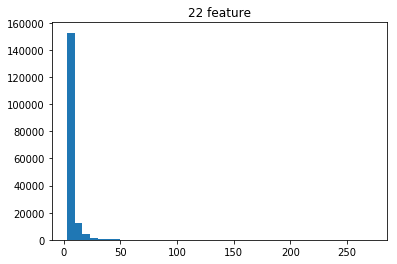

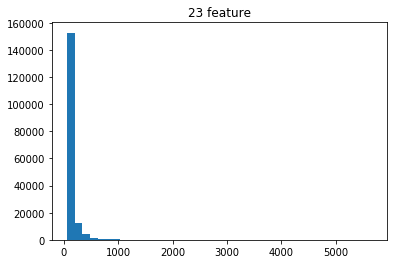

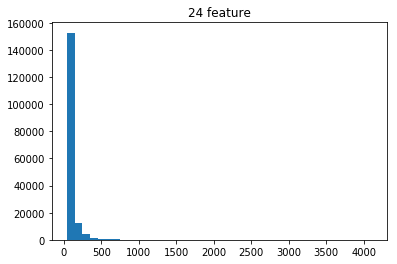

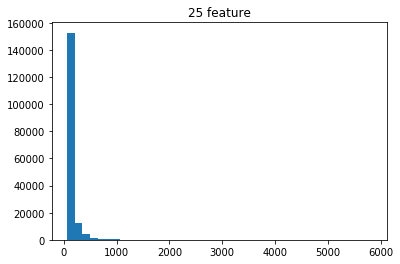

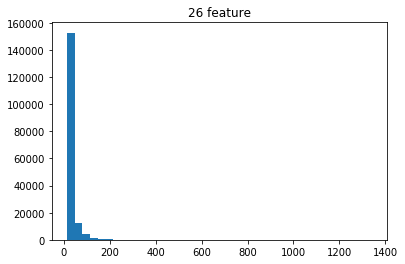

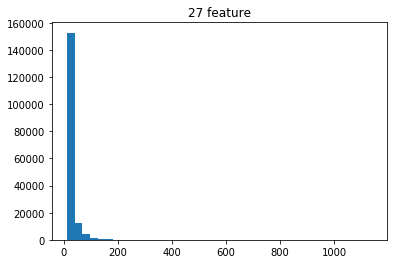

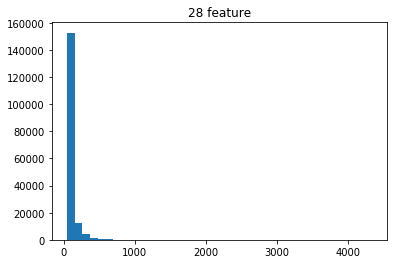

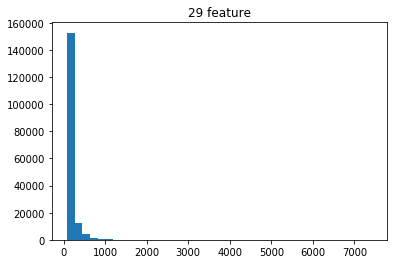

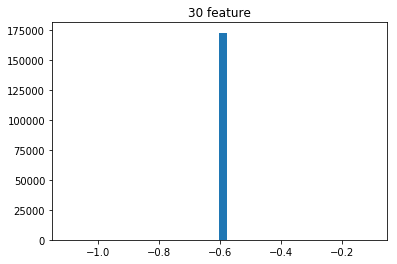

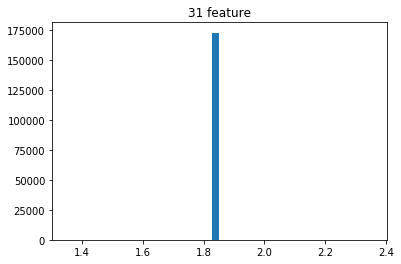

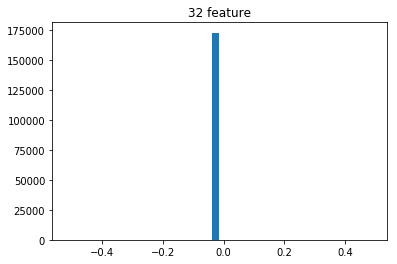

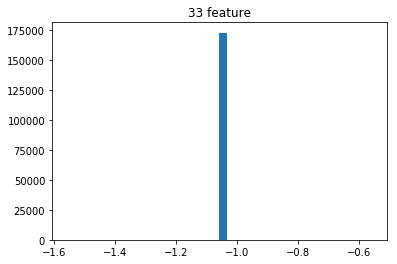

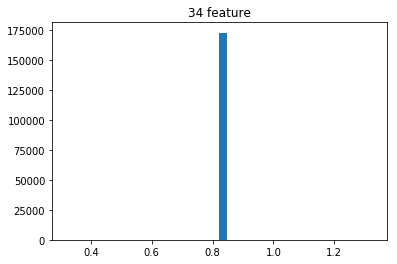

In [20]:
for i in range(35):
    plt.hist(sliced[i], bins=40)
    plt.title("{} feature".format(i))
    plt.show()

Как мы видим, признаки распределены не нормально. Большинство признаков принимают значения лишь в окрестностях двух точек. Визуально 31-35 признаки не кажутся информативными - они принимают одно значение в подавляющем большинстве случаев. Смотря на визуализацию значений признаков оно и понятно - эти признаки выделяют лишь надртсь да глаза собаки - лишь малую часть пикселей. Наверняка, это просто большая степень от яркости исходного изображения - вот и "выжило" только самое яркое

Выбросы осмысленно искать только в 3,4,8, 9, 22, 23-29 признаках

In [21]:
anomaly = [3,4,8,9,22]+list(range(23, 30))
PERCENT_OF_ANOMALY = 3e-4 #столько аномальных объектов удалим из каждого признака в процентах
n_to_del = int(PERCENT_OF_ANOMALY * sliced.shape[1])
n_to_del

51

In [22]:
indxs_to_del = set()
for i in anomaly:
    indxs_to_del.update(numpy.argpartition(sliced[i], -n_to_del)[-n_to_del:])

In [23]:
sliced = np.delete(sliced, list(indxs_to_del), axis=1)
y = np.delete(y, list(indxs_to_del))

Как видно ниже, удаление этой сотни пикселей улучшило картину распределения, выбросов больше нет, важной информации, как мы видим по местоположению удаленных пикселей, мы тоже не потеряли

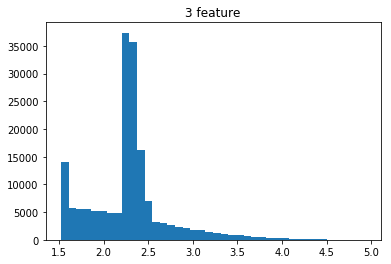

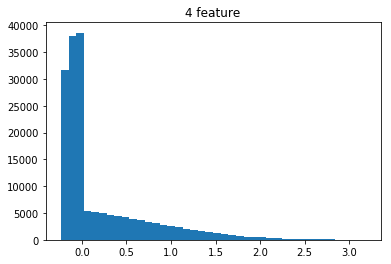

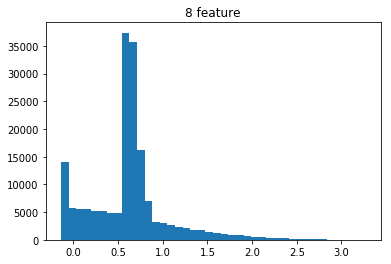

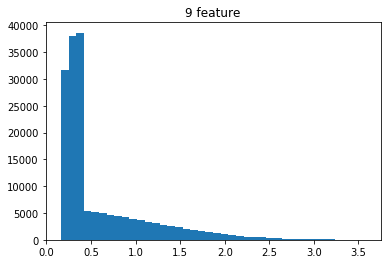

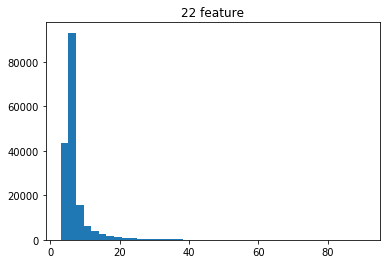

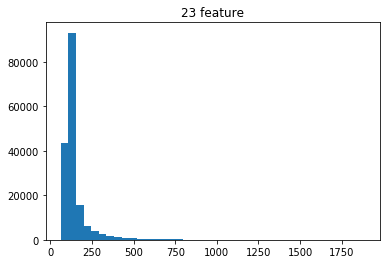

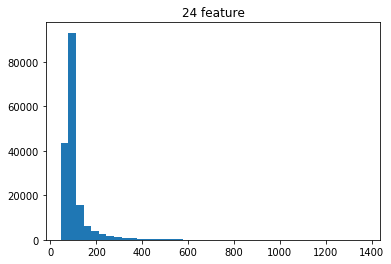

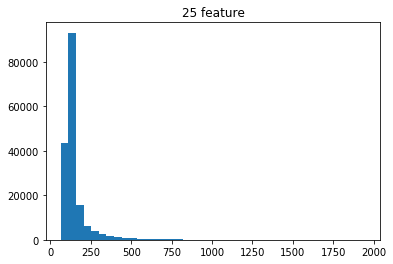

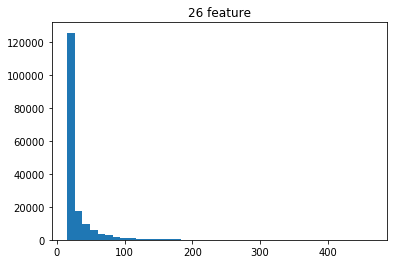

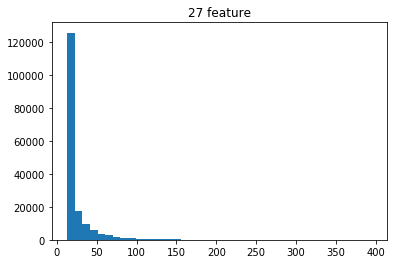

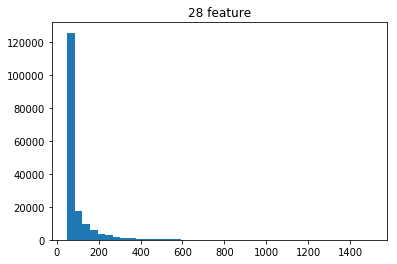

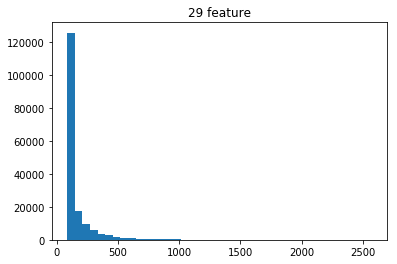

In [24]:
for i in anomaly:
    plt.hist(sliced[i], bins=40)
    plt.title("{} feature".format(i))
    plt.show()

In [25]:
def get_pixel(x, IMSIZE=IMSIZE):
    """Возвращает координату пикселя по значению"""
    return (x // IMSIZE[1], x%IMSIZE[1])

In [26]:
list(map(get_pixel, indxs_to_del)), len(indxs_to_del)

([(82, 142),
  (37, 188),
  (211, 55),
  (149, 135),
  (222, 76),
  (136, 321),
  (12, 469),
  (51, 469),
  (128, 555),
  (115, 223),
  (132, 199),
  (17, 28),
  (146, 460),
  (10, 172),
  (19, 369),
  (220, 312),
  (242, 339),
  (190, 6),
  (83, 123),
  (57, 468),
  (275, 384),
  (283, 162),
  (104, 252),
  (214, 373),
  (123, 42),
  (61, 116),
  (106, 584),
  (104, 261),
  (17, 588),
  (45, 61),
  (84, 575),
  (275, 414),
  (109, 337),
  (180, 464),
  (118, 24),
  (86, 415),
  (7, 516),
  (138, 240),
  (240, 75),
  (40, 558),
  (268, 69),
  (118, 558),
  (1, 60),
  (9, 362),
  (270, 415),
  (133, 219),
  (29, 573),
  (274, 55),
  (15, 344),
  (261, 240),
  (174, 575),
  (123, 155),
  (159, 430),
  (185, 90),
  (270, 465),
  (249, 362),
  (81, 466),
  (76, 419),
  (245, 231),
  (199, 378),
  (139, 268),
  (88, 364),
  (21, 392),
  (245, 268),
  (50, 293),
  (186, 72),
  (258, 113),
  (169, 126),
  (102, 170),
  (132, 487),
  (69, 144),
  (157, 245),
  (65, 5),
  (87, 548),
  (275, 151

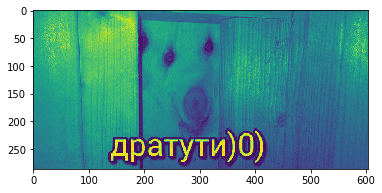

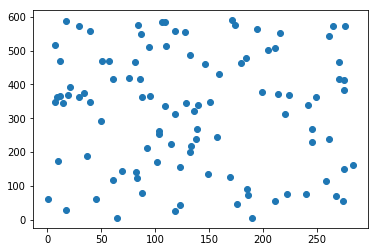

In [27]:
plt.imshow(np.array(data.y).reshape(IMSIZE))
plt.show()
plt.scatter(np.array(list(map(get_pixel, indxs_to_del)))[:,0],np.array(list(map(get_pixel, indxs_to_del)))[:,1])
#plt.show()

Если бы нашу задачу мы решали в рамках machine learning, стоило бы еще нормировать все наши признаки, но так как мы занимаемся классической статистикой, то этот шаг не делаем

# Построение моделей

In [28]:
sliced.shape

(35, 172642)

In [29]:
cols = ["f{}".format(x) for x in range(35)]
data = pd.DataFrame(sliced.transpose(), columns=cols)
data["y"] = y
data.head(10)

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f26,f27,f28,f29,f30,f31,f32,f33,f34,y
0,0.496714,-0.138264,1.647689,2.288549,0.859431,-0.070241,0.473764,1.23023,0.624677,1.256353,...,45.607623,38.750030,147.605407,252.427767,-0.601707,1.852278,-0.013497,-1.057711,0.822545,-0.395687
1,0.496714,-0.138264,1.647689,2.293655,-0.079660,-0.070241,0.473764,1.23023,0.629783,0.317261,...,17.831804,15.150602,57.711200,98.694957,-0.601707,1.852278,-0.013497,-1.057711,0.822545,-0.378393
2,0.496714,-0.138264,1.647689,2.296195,1.243614,-0.070241,0.473764,1.23023,0.632323,1.640535,...,66.970839,56.901059,216.745739,370.668282,-0.601707,1.852278,-0.013497,-1.057711,0.822545,-0.393685
3,0.496714,-0.138264,1.647689,2.296195,0.714635,-0.070241,0.473764,1.23023,0.632323,1.111556,...,39.459637,33.526459,127.707943,218.400068,-0.601707,1.852278,-0.013497,-1.057711,0.822545,-0.390444
4,0.496714,-0.138264,1.647689,2.288549,0.422087,-0.070241,0.473764,1.23023,0.624677,0.819008,...,29.451076,25.022793,95.316041,163.004973,-0.601707,1.852278,-0.013497,-1.057711,0.822545,-0.395569
5,0.496714,-0.138264,1.647689,2.283409,0.157620,-0.070241,0.473764,1.23023,0.619537,0.554542,...,22.607099,19.207880,73.166059,125.125124,-0.601707,1.852278,-0.013497,-1.057711,0.822545,-0.392292
6,0.496714,-0.138264,1.647689,2.288549,0.056618,-0.070241,0.473764,1.23023,0.624677,0.453539,...,20.435252,17.362593,66.137049,113.104445,-0.601707,1.852278,-0.013497,-1.057711,0.822545,-0.390403
7,0.496714,-0.138264,1.647689,2.296195,-0.173187,-0.070241,0.473764,1.23023,0.632323,0.223735,...,16.239669,13.797861,52.558384,89.882855,-0.601707,1.852278,-0.013497,-1.057711,0.822545,-0.378668
8,0.496714,-0.138264,1.647689,2.291106,0.340416,-0.070241,0.473764,1.23023,0.627234,0.737337,...,27.141378,23.060382,87.840889,150.221323,-0.601707,1.852278,-0.013497,-1.057711,0.822545,-0.403689
9,0.496714,-0.138264,1.647689,2.308773,1.524297,-0.070241,0.473764,1.23023,0.644901,1.921218,...,88.671699,75.338963,286.978829,490.777582,-0.601707,1.852278,-0.013497,-1.057711,0.822545,-0.352598


In [30]:
import statsmodels.api as sm

for feature in cols:
    model = sm.OLS.from_formula('y~'+str(feature), data=data).fit()
    print (model.summary())

C:\Users\plyus\AppData\Local\conda\conda\envs\py36\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.244
Model:                            OLS   Adj. R-squared:                  0.244
Method:                 Least Squares   F-statistic:                 5.567e+04
Date:                Sat, 27 Apr 2019   Prob (F-statistic):               0.00
Time:                        22:58:12   Log-Likelihood:                 86906.
No. Observations:              172642   AIC:                        -1.738e+05
Df Residuals:                  172640   BIC:                        -1.738e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2719      0.001   -282.851      0.0

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.317
Model:                            OLS   Adj. R-squared:                  0.317
Method:                 Least Squares   F-statistic:                 8.028e+04
Date:                Sat, 27 Apr 2019   Prob (F-statistic):               0.00
Time:                        22:58:13   Log-Likelihood:                 95743.
No. Observations:              172642   AIC:                        -1.915e+05
Df Residuals:                  172640   BIC:                        -1.915e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3013      0.001   -416.680      0.0

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.244
Model:                            OLS   Adj. R-squared:                  0.244
Method:                 Least Squares   F-statistic:                 5.567e+04
Date:                Sat, 27 Apr 2019   Prob (F-statistic):               0.00
Time:                        22:58:14   Log-Likelihood:                 86906.
No. Observations:              172642   AIC:                        -1.738e+05
Df Residuals:                  172640   BIC:                        -1.738e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2389      0.001   -218.622      0.0

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.603
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                 2.623e+05
Date:                Sat, 27 Apr 2019   Prob (F-statistic):               0.00
Time:                        22:58:15   Log-Likelihood:             1.4255e+05
No. Observations:              172642   AIC:                        -2.851e+05
Df Residuals:                  172640   BIC:                        -2.851e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.7577      0.001  -1275.644      0.0

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     34.75
Date:                Sat, 27 Apr 2019   Prob (F-statistic):           3.75e-09
Time:                        22:58:16   Log-Likelihood:                 62798.
No. Observations:              172642   AIC:                        -1.256e+05
Df Residuals:                  172640   BIC:                        -1.256e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4863      0.001   -694.503      0.0

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   -0.2797
Date:                Sat, 27 Apr 2019   Prob (F-statistic):               1.00
Time:                        22:58:17   Log-Likelihood:                 62781.
No. Observations:              172642   AIC:                        -1.256e+05
Df Residuals:                  172640   BIC:                        -1.255e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.213e+09   6.19e+09     -0.519      0.6

Как видно из информации выше, некоторые признаки имеют слишком большой (например, f30-f34) или слишком малый коэффициент. С такими признаками надо работать с особой осторожностью. По-уму, надо бы сделать нормализацию этих признаков, но в рамках классической статистики это не имеет смысла, так как мы не штрафуем за огромные весовые коэффициентЫ. Также по R-squared мы видим, что некоторые признаки являются слабо информативными: по ним объясняется оооочень малая доля дисперсии

In [31]:
bad_features = ["f"+str(i) for i in [3,22,23,24,25,30,31,32,33,34]]
good_features = sorted(list(set(cols) - set(bad_features)))

Вообще, задача синтетическая, и факт того, что R-squared для разных фичей совпадает как минимум до 3 знака после запятой намекает нам, что эти признаки - мультиколлинеарны. Заметим это, но не будем этим злоупотреблять. На реальных данных такого не будет. Уникальными являются лишь первые 5 признаков, остальные - их копии с точностью до аффинных преобразований

In [32]:
unique_features = ["f"+str(i) for i in range(5)]

In [66]:
test = np.load("regression_x_test.npy")
print(test.shape)
sliced_test = test.reshape(-1,35)
sliced_test = pd.DataFrame(sliced_test, columns=cols)
sliced_test.head()


(420, 620, 35)


,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34
0,0.496714,0.861736,0.647689,1.930339,-0.096312,-0.070241,1.473764,0.23023,0.266467,0.300610,...,96.901283,17.537338,14.900412,56.758186,97.065158,-0.601707,1.852278,-0.013497,-1.057711,0.822545
1,0.496714,0.861736,0.647689,1.824616,-0.110487,-0.070241,1.473764,0.23023,0.160744,0.286435,...,87.179575,17.290497,14.690686,55.959305,95.698949,-0.601707,1.852278,-0.013497,-1.057711,0.822545
2,0.496714,0.861736,0.647689,2.036428,-0.126482,-0.070241,1.473764,0.23023,0.372556,0.270440,...,107.746580,17.016132,14.457575,55.071345,94.180402,-0.601707,1.852278,-0.013497,-1.057711,0.822545
3,0.496714,0.861736,0.647689,1.661662,-0.123893,-0.070241,1.473764,0.23023,-0.002210,0.273028,...,74.070426,17.060244,14.495054,55.214108,94.424549,-0.601707,1.852278,-0.013497,-1.057711,0.822545
4,0.496714,0.861736,0.647689,2.622118,-0.110487,-0.070241,1.473764,0.23023,0.958245,0.286435,...,193.537559,17.290497,14.690686,55.959305,95.698949,-0.601707,1.852278,-0.013497,-1.057711,0.822545


In [65]:
test.shape, data.shape

((420, 620, 35), (172642, 36))

In [34]:
def draw_prediction(model, sliced_test, IMSIZE=(420,620)):
    predictions = invb(model.predict(sliced_test), lambda_)
    predictions = predictions.reshape(IMSIZE)
    plt.imshow(predictions, "gray")

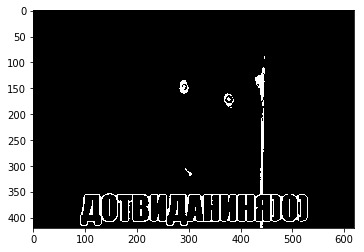

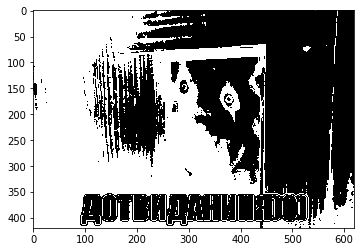

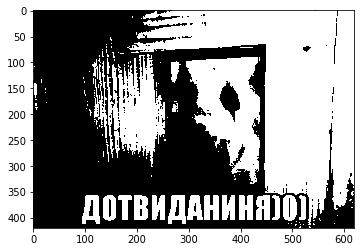

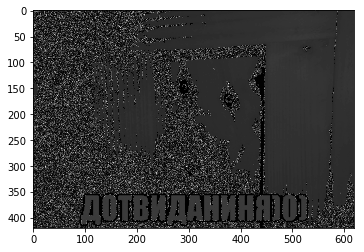

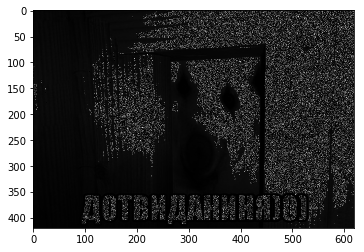

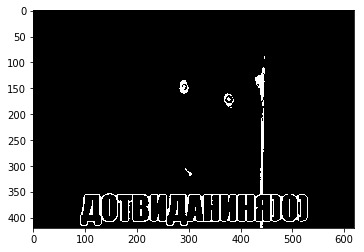

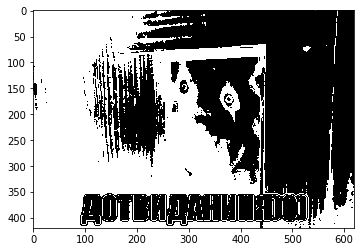

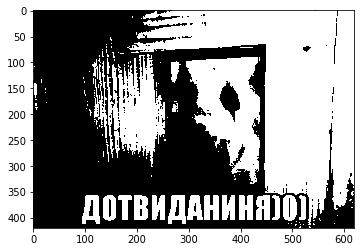

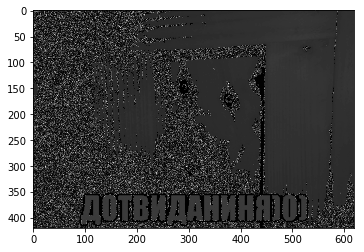

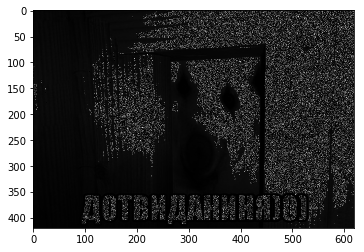

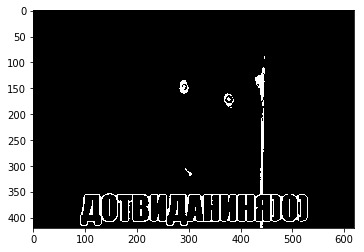

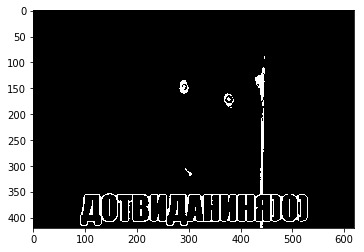

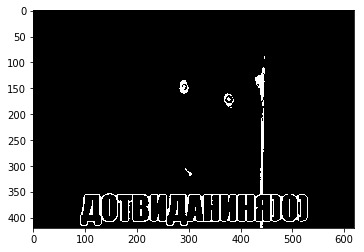

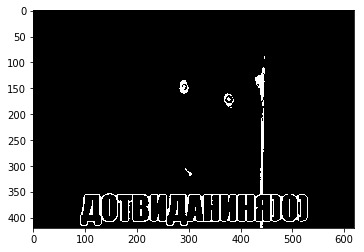

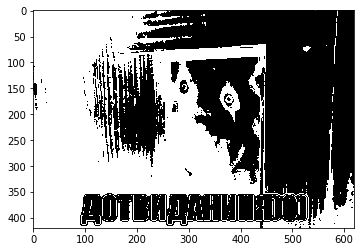

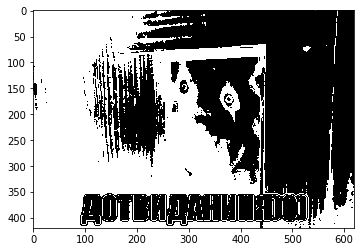

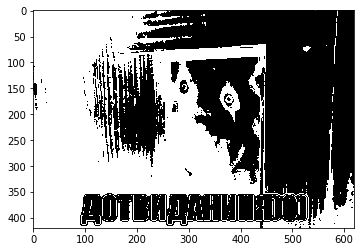

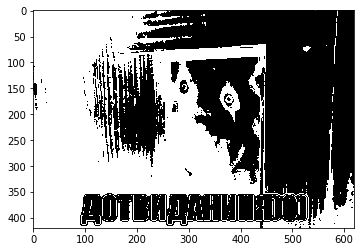

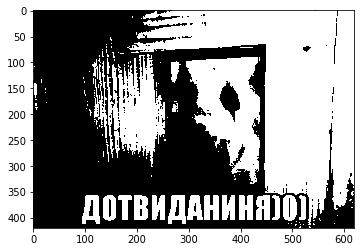

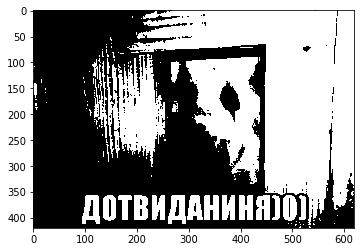

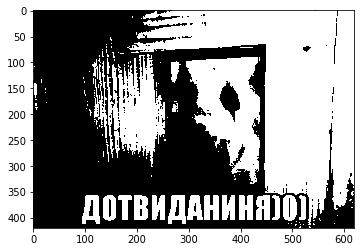

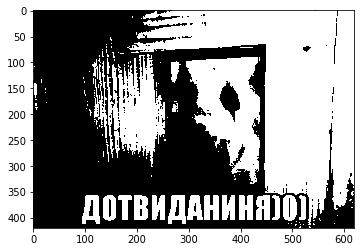

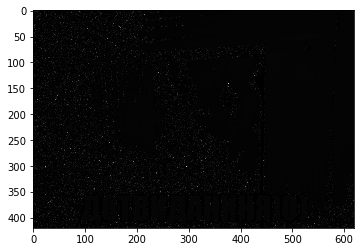

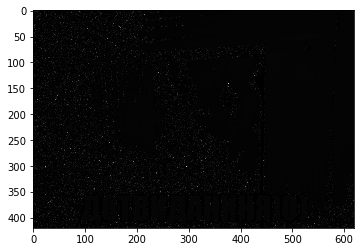

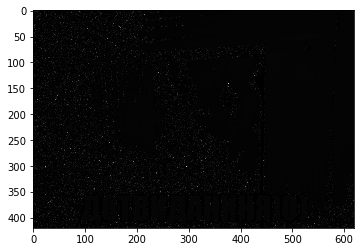

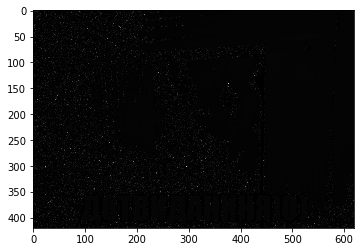

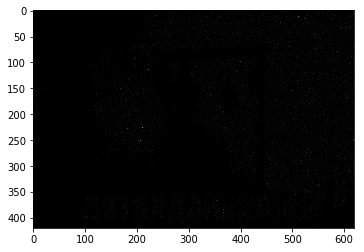

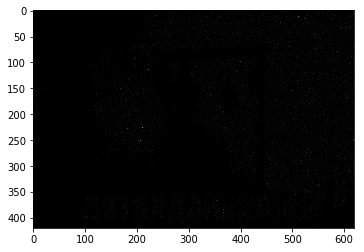

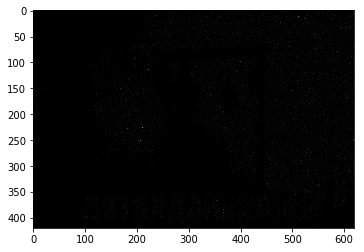

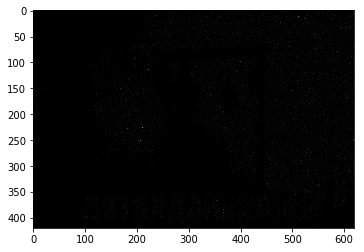

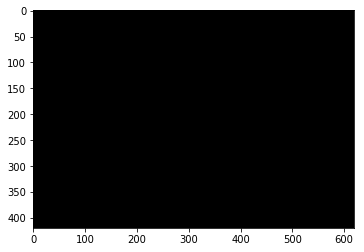

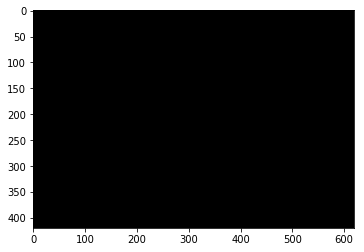

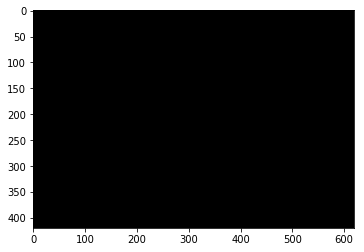

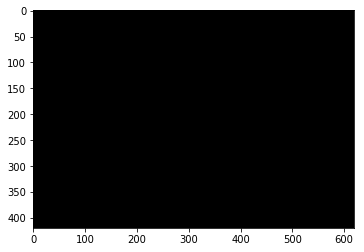

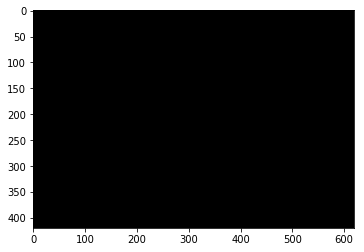

In [45]:
sliced_t = np.transpose(test, (2,0,1))
for i in range(35):
    plt.imshow(sliced_t[i], "gray")
    plt.show()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                 8.884e+04
Date:                Sat, 27 Apr 2019   Prob (F-statistic):               0.00
Time:                        23:05:09   Log-Likelihood:             1.7271e+05
No. Observations:              172642   AIC:                        -3.454e+05
Df Residuals:                  172636   BIC:                        -3.453e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.391e+09    3.4e+09      0.704      0.4

C:\Users\plyus\AppData\Local\conda\conda\envs\py36\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until


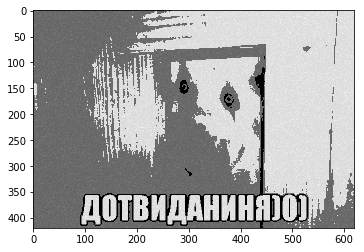

In [68]:
model = sm.OLS.from_formula('y ~'+"+".join(unique_features), data=data).fit()
print(model.summary())
draw_prediction(model, sliced_test)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                 8.987e+04
Date:                Sat, 27 Apr 2019   Prob (F-statistic):               0.00
Time:                        23:05:18   Log-Likelihood:             1.7342e+05
No. Observations:              172642   AIC:                        -3.468e+05
Df Residuals:                  172636   BIC:                        -3.468e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.953e+04   6.59e+05     -0.045      0.9

C:\Users\plyus\AppData\Local\conda\conda\envs\py36\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until


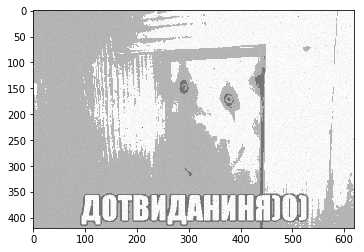

In [69]:
model = sm.OLS.from_formula('y ~'+"+".join(good_features), data=data).fit()
print(model.summary())
draw_prediction(model, sliced_test)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                 7.536e+04
Date:                Sat, 27 Apr 2019   Prob (F-statistic):               0.00
Time:                        23:05:20   Log-Likelihood:             1.7381e+05
No. Observations:              172642   AIC:                        -3.476e+05
Df Residuals:                  172635   BIC:                        -3.475e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.617e-06   5.61e-09   -288.259      0.0

C:\Users\plyus\AppData\Local\conda\conda\envs\py36\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until


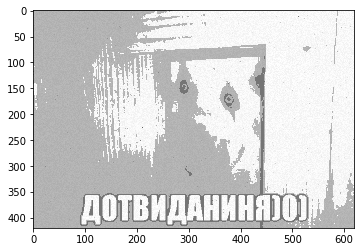

In [70]:
model = sm.OLS.from_formula('y ~'+"+".join(cols), data=data).fit()
print(model.summary())
draw_prediction(model, sliced_test)

Как мы видим, R squared, что на 5, что на 25, что на всех 35 почти не отличается. Также, стоит заметить, какими огромными по модулю и разными по порядку получаются весовые коэффициенты. Машинленер внутри меня орет. Все, не будем больше об этом

Вообще, отметив лайфак про 5 важных признаков можно построить модель, учитывающую всевозможные межфакторные взаимодействия, на 5 признаках это не слишком много.

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                 2.959e+06
Date:                Sat, 27 Apr 2019   Prob (F-statistic):               0.00
Time:                        23:10:50   Log-Likelihood:             4.9828e+05
No. Observations:              172642   AIC:                        -9.965e+05
Df Residuals:                  172632   BIC:                        -9.964e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -3.275e+08   1.17e+09     -0.

C:\Users\plyus\AppData\Local\conda\conda\envs\py36\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until


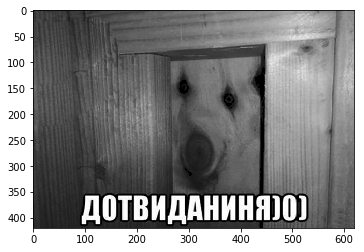

In [101]:
model = sm.OLS.from_formula('y ~'+"*".join(unique_features), data=data).fit()
print(model.summary())
draw_prediction(model, sliced_test)

Бинго! Наша модель объясняет больше 99% дисперсии! Отличный результат. И картинка получается хорошая

Все-таки решим проблему мультиколлинеарности и разбегающихся по модулю коэффициентов

Добавлять никакие другие признаки мы не будем (ниже это все таки сделано). Дальнейший анализ сделан для текущей модели

In [106]:
#model.wald_test("=".join(unique_features)+"=0")

Проверим нормальность остатков

In [112]:
eps = data.y - model.predict(data[cols])

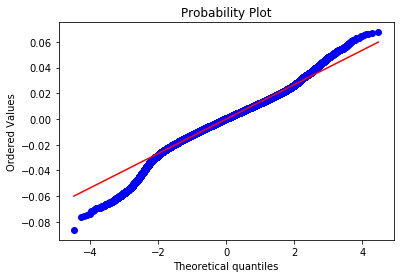

In [115]:
qq_points, qq_line =st.probplot(eps, plot=plt)
plt.show()

(array([8.0000e+00, 3.2500e+02, 1.0610e+03, 4.4300e+03, 3.2449e+04,
        7.9424e+04, 4.7185e+04, 6.7030e+03, 9.5000e+02, 1.0700e+02]),
 array([-0.08619337, -0.07083347, -0.05547357, -0.04011367, -0.02475377,
        -0.00939387,  0.00596604,  0.02132594,  0.03668584,  0.05204574,
         0.06740564]),
 <a list of 10 Patch objects>)

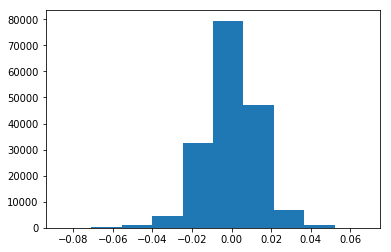

In [114]:
plt.hist(eps)

In [116]:
st.shapiro(eps[:5000]) #при количестве объектов больше 5000 функция ведет себя некорректно

(0.9994975924491882, 0.20914548635482788)

Гипотезу о нормальности остатков отвергнуть нельзя

In [117]:
from statsmodels.stats.diagnostic import het_white

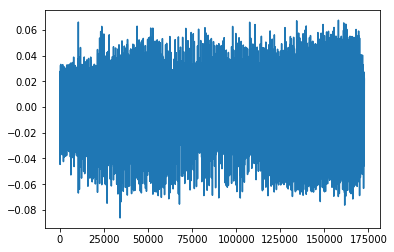

In [118]:
plt.plot(eps)

По графику видно, что остатки гетероскедастичны и в целом несмещены. Так как объектов слишком много, то малейшее отклонение от среднего 0 на такой большой выборке будет жестко отклонено стат. тестами

In [126]:
st.ttest_1samp(eps, 0)

Ttest_1sampResult(statistic=-3.066370107100446, pvalue=0.002167084075926068)

In [133]:
#Иллюстрация моего комментария выше
st.ttest_1samp(np.random.randn(175000)+0.000001,0)

Ttest_1sampResult(statistic=-0.7247633147752356, pvalue=0.468598214087674)

In [135]:
cook = model.get_influence().summary_frame().loc[:,'cooks_d']

C:\Users\plyus\AppData\Local\conda\conda\envs\py36\lib\site-packages\statsmodels\stats\outliers_influence.py:323: RuntimeWarning: invalid value encountered in sqrt
  dffits_ = self.resid_studentized_internal * np.sqrt(hii / (1 - hii))


KeyboardInterrupt: 

Необходимости в удалении выбросов нет (тем более мы и так их убрали)

Таким образом мы провели корректный анализ линейной регрессии, восстановили требуемое изображение

# НЕНУЖНОЕ БЕСПОЛЕЗНОЕ ПРИЛОЖЕНИЕ - ЭКСПЕРИМЕНТЫ
# Добавление полиномиальных признаков, масштабирование

In [77]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [80]:
from sklearn.preprocessing import PolynomialFeatures

In [81]:
poly = PolynomialFeatures(2)
data_poly_unique = poly.fit_transform(data[unique_features])
scaler = StandardScaler()
data_poly_unique_scaled = scaler.fit_transform(data_poly_unique)

test_unique_poly = poly.fit_transform(sliced_test[unique_features])
test_unique_poly_scaled = scaler.transform(test_unique_poly)

In [94]:
data_train = np.load("regression_x_train.npy")
data_train = np.transpose(data_train, (2,0,1)).reshape(-1, 35)
data_train = pd.DataFrame(data_train, columns=cols)
data_train.head()

data_train_unique_poly = poly.fit_transform(data_train[unique_features])
data_train_unique_poly_scaled = scaler.transform(data_train_unique_poly)

In [97]:
model = Ridge(alpha=1)
model.fit(data_poly_unique_scaled, data.y)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

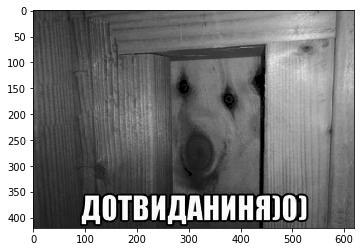

In [99]:
draw_prediction(model, test_unique_poly_scaled)